# **The Prediction of Online Shoppers Purchasing Intention**

Data Source: [
Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset)

In [ ]:
student_id = '47772360'
student_name = 'Do Minh Huu Nguyen'

## **1. Introduction**

In today's digital age, there is an increase in the e-commerce usage have grown in the past few years. With the growth of e-commerce platforms, understanding customer behavior is crucial for businesses to optimize their marketing strategies and ultimately increase the revenue.





Here's the explanation of each column in the following dataset:

|Column|Meaning|
|:-----:|:-----:
|Administrative|Number of pages visited by the visitor about account management|
|Administrative duration|Total amount of times (in secs) spent by the visitor on account management related pages|
|Informational|Number of pages visited by the visitor about Web site, communication and address information of the shopping site|
|Informational duration|Total amount of time (in secs) spent by the visitor on informational pages|
|Product related|Number of pages visited by visitor about product related pages |
|Product related duration|Total amount of time (in secs) spent by the visitor on product related pages|
|Bounce rate|Average bounce rate value of the pages visited by the visitor|
|Exit rate|Average exit rate value of the pages visited by the visitor |
|Page value|Average value for a web page that a user visited before completing an e-commerce transaction.|
|Special day|Closeness of the site visiting time to a special day|
|OperatingSystems|Operating system of the visitor|
|Browser|Browser of the visitor|
|Region|Geographic region from which the session has been started by the visitor|
|TrafficType|Traffic source by which the visitor has arrived at the Web site(e.g., banner, SMS, direct)|
|VisitorType|Visitor type as "New Visitor", "Returning Visitor", and "Other"|
|Weekend|Boolean value indicating whether the date of the visit is weekend|
|Month|Month value of the visit date|
|Revenue|Class label indicating whether the visit has been finalized with a transaction|


The target variable, which is "Revenue", indicates whether the user ends up with shopping or not, reflecting through "True" or "False"

### **Objectives**

This project aims to analyze the online shoppers'behavior to identify key patterns and factors influencing purchasing decisions. By analyzing this dataset, we will be able to:
1. Analyze the correlation between the browsing behaviors and purchasing decisions
2. Identify which features influence the purchasing intention of online shoppers and Predict whether a shopper will generate revenue
3. Compare which models is more efficient compared to the other (Logistic Regression/KNN Classifier)


Hence, there should be imported libraries needed for further uses along the analysis:

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
import math

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2. Data Preparation and Exploration**

### **2.1 Data Preparation**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/COMP6200/Portfolio_Part4/online_shoppers_intention.csv')

#### **Data Cleansing**
In this section, we need to gather general knowledge about the dataset and prepare it for further analysis and interpretation through cleaning and standardizing process.

In [ ]:
#First of all, we need to gather basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
#check the unique values for all of the features
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Administrative': [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Unique values in column 'Administrative_Duration': [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
Unique values in column 'Informational': [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
Unique values in column 'Informational_Duration': [  0.   120.    16.   ... 547.75 368.25 211.25]
Unique values in column 'ProductRelated': [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 13

In [ ]:
rows, columns = df.shape
print("The length of 'Online Shoppers Purchasing Intention' dataset is",(len(df)),"with",str(rows),"rows and",str(columns),"columns.")

The length of 'Online Shoppers Purchasing Intention' dataset is 12330 with 12330 rows and 18 columns.


#### **Data Encoding**
The purpose of this section is to convert the categorical data into numerical data using OrdinalEncoder.


In [ ]:
#OrdinalEncoder model
ord_enc = OrdinalEncoder()

In [ ]:
encoded_df = df

##### **Encode 'Month', 'Visitor Type', 'Weekend', 'Revenue' columns**

In [ ]:
#List all of the categories for the variables needed to be encoded
categories = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'VisitorType': ['New_Visitor', 'Returning_Visitor', 'Other'],
    'Weekend': [False, True],
    'Revenue': [False, True]
}


In [ ]:
#Initialise the Ordinal Encoder with the aforementioned orders
ord_enc = OrdinalEncoder(categories=[categories['Month'], categories['VisitorType'], categories['Weekend'], categories['Revenue']])

#Select which columns to be encoded + Extract the data
columns_for_enc = ['Month', 'VisitorType', 'Weekend', 'Revenue']
data_for_enc = encoded_df[columns_for_enc]

# Apply the encoder
encoded_data = ord_enc.fit_transform(data_for_enc)

# Replace the original columns with the encoded data
for i, col in enumerate(columns_for_enc):
    encoded_df[col] = encoded_data[:, i]

print(encoded_df.head())



   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0    1.0                 1   
1         0.00       0.10         0.0         0.0    1.0

In [ ]:
# Retrieve the categories (the order of encoding) and create mappings
all_mappings = {}
for col, categories in zip(columns_for_enc, ord_enc.categories_):
    mapping = {category: idx for idx, category in enumerate(categories)}
    all_mappings[col] = mapping

# Display the mappings
all_mappings


{'Month': {'Jan': 0,
  'Feb': 1,
  'Mar': 2,
  'Apr': 3,
  'May': 4,
  'June': 5,
  'Jul': 6,
  'Aug': 7,
  'Sep': 8,
  'Oct': 9,
  'Nov': 10,
  'Dec': 11},
 'VisitorType': {'New_Visitor': 0, 'Returning_Visitor': 1, 'Other': 2},
 'Weekend': {False: 0, True: 1},
 'Revenue': {False: 0, True: 1}}

In [ ]:
#Verify the first few rows and dataset structures after encoding
encoded_df.head()
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  float64
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### **2.2 Data Exploration**

In [ ]:
#Descriptive statistic for all of the features
encoded_df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,6.651987,2.124006,2.357097,3.147364,4.069586,0.869505,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.356740,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,4.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,10.000000,3.000000,2.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,11.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


####**2.2.1 Univariate Analysis**

This univariate analysis provides a detailed observation at the distributions and patterns within the datasets regarding the features, which may helps us to understand the influence of them on visitors'likelihood to generate revenues. This will be analysed more in the bivariate analysis.



#####**Numerical Features**

The dataset comprises Numerical Features including:

1. Administrative
2. Administrative_Duration
3. Informational
4. Informational_Duration
5. Produxted Related
6. ProductRelated_Duration
7. BounceRates
8. ExitRates
9. PageValues
10. SpecialDay


**Box Plot**

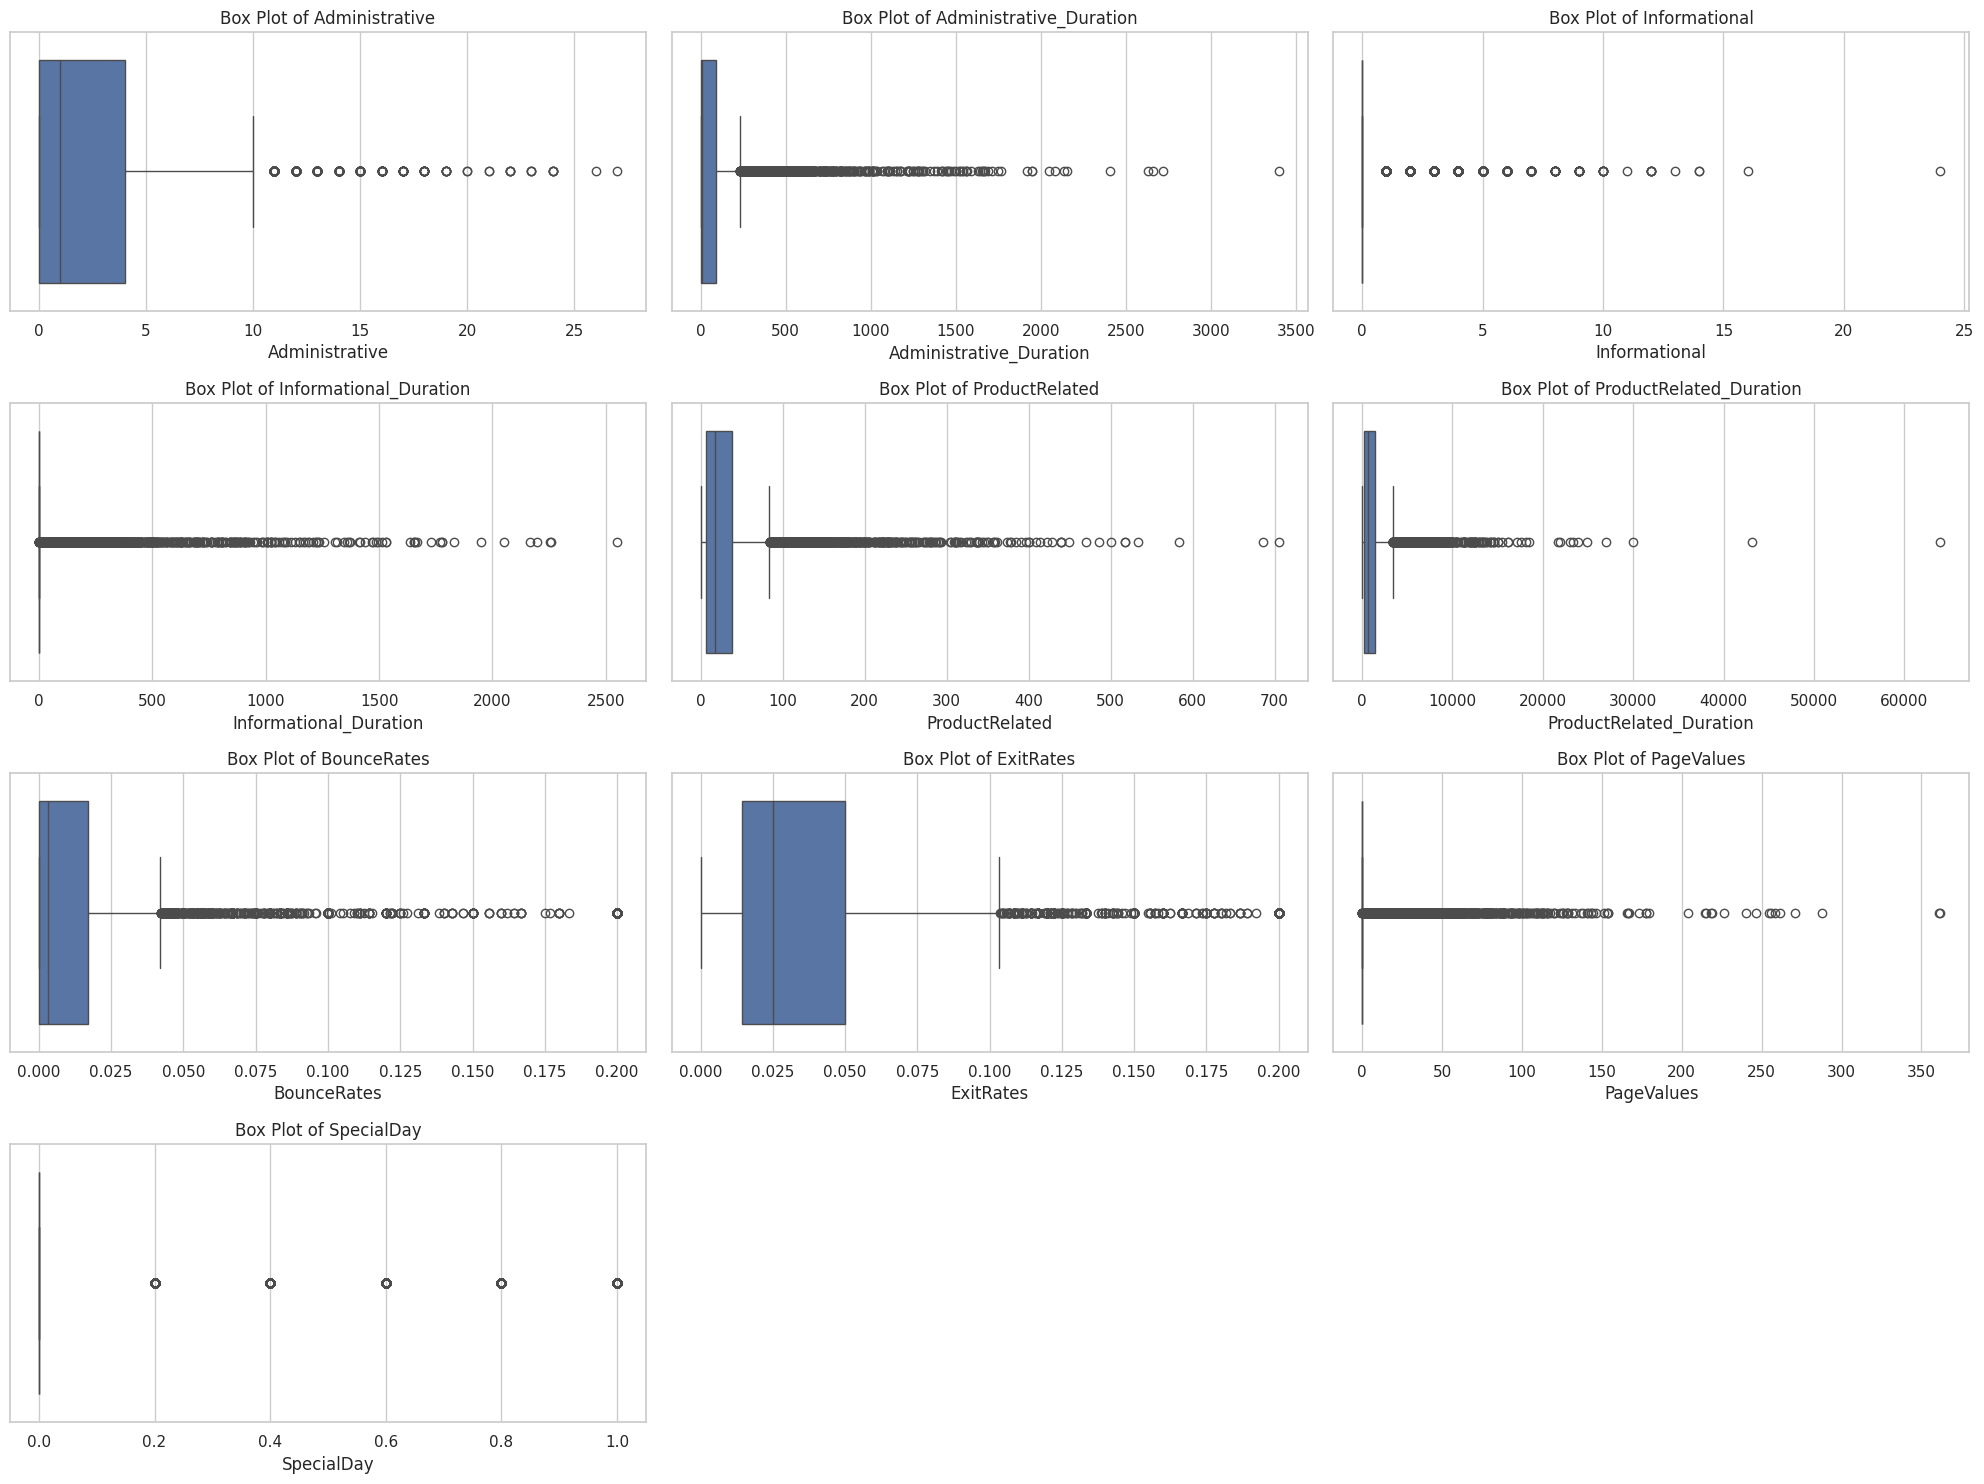

In [ ]:
# List of numerical columns to plot
num_columns = ['Administrative', 'Administrative_Duration', 'Informational',
               'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
               'BounceRates', 'ExitRates', 'PageValues','SpecialDay']

# Set up the figure size and style
plt.figure(figsize=(20, 15))
sns.set(style="whitegrid")

# Create a box plot for each numerical feature
for i, col in enumerate(num_columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[col])
    sns.color_palette()
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

plt.show()

**Distribution Plot**

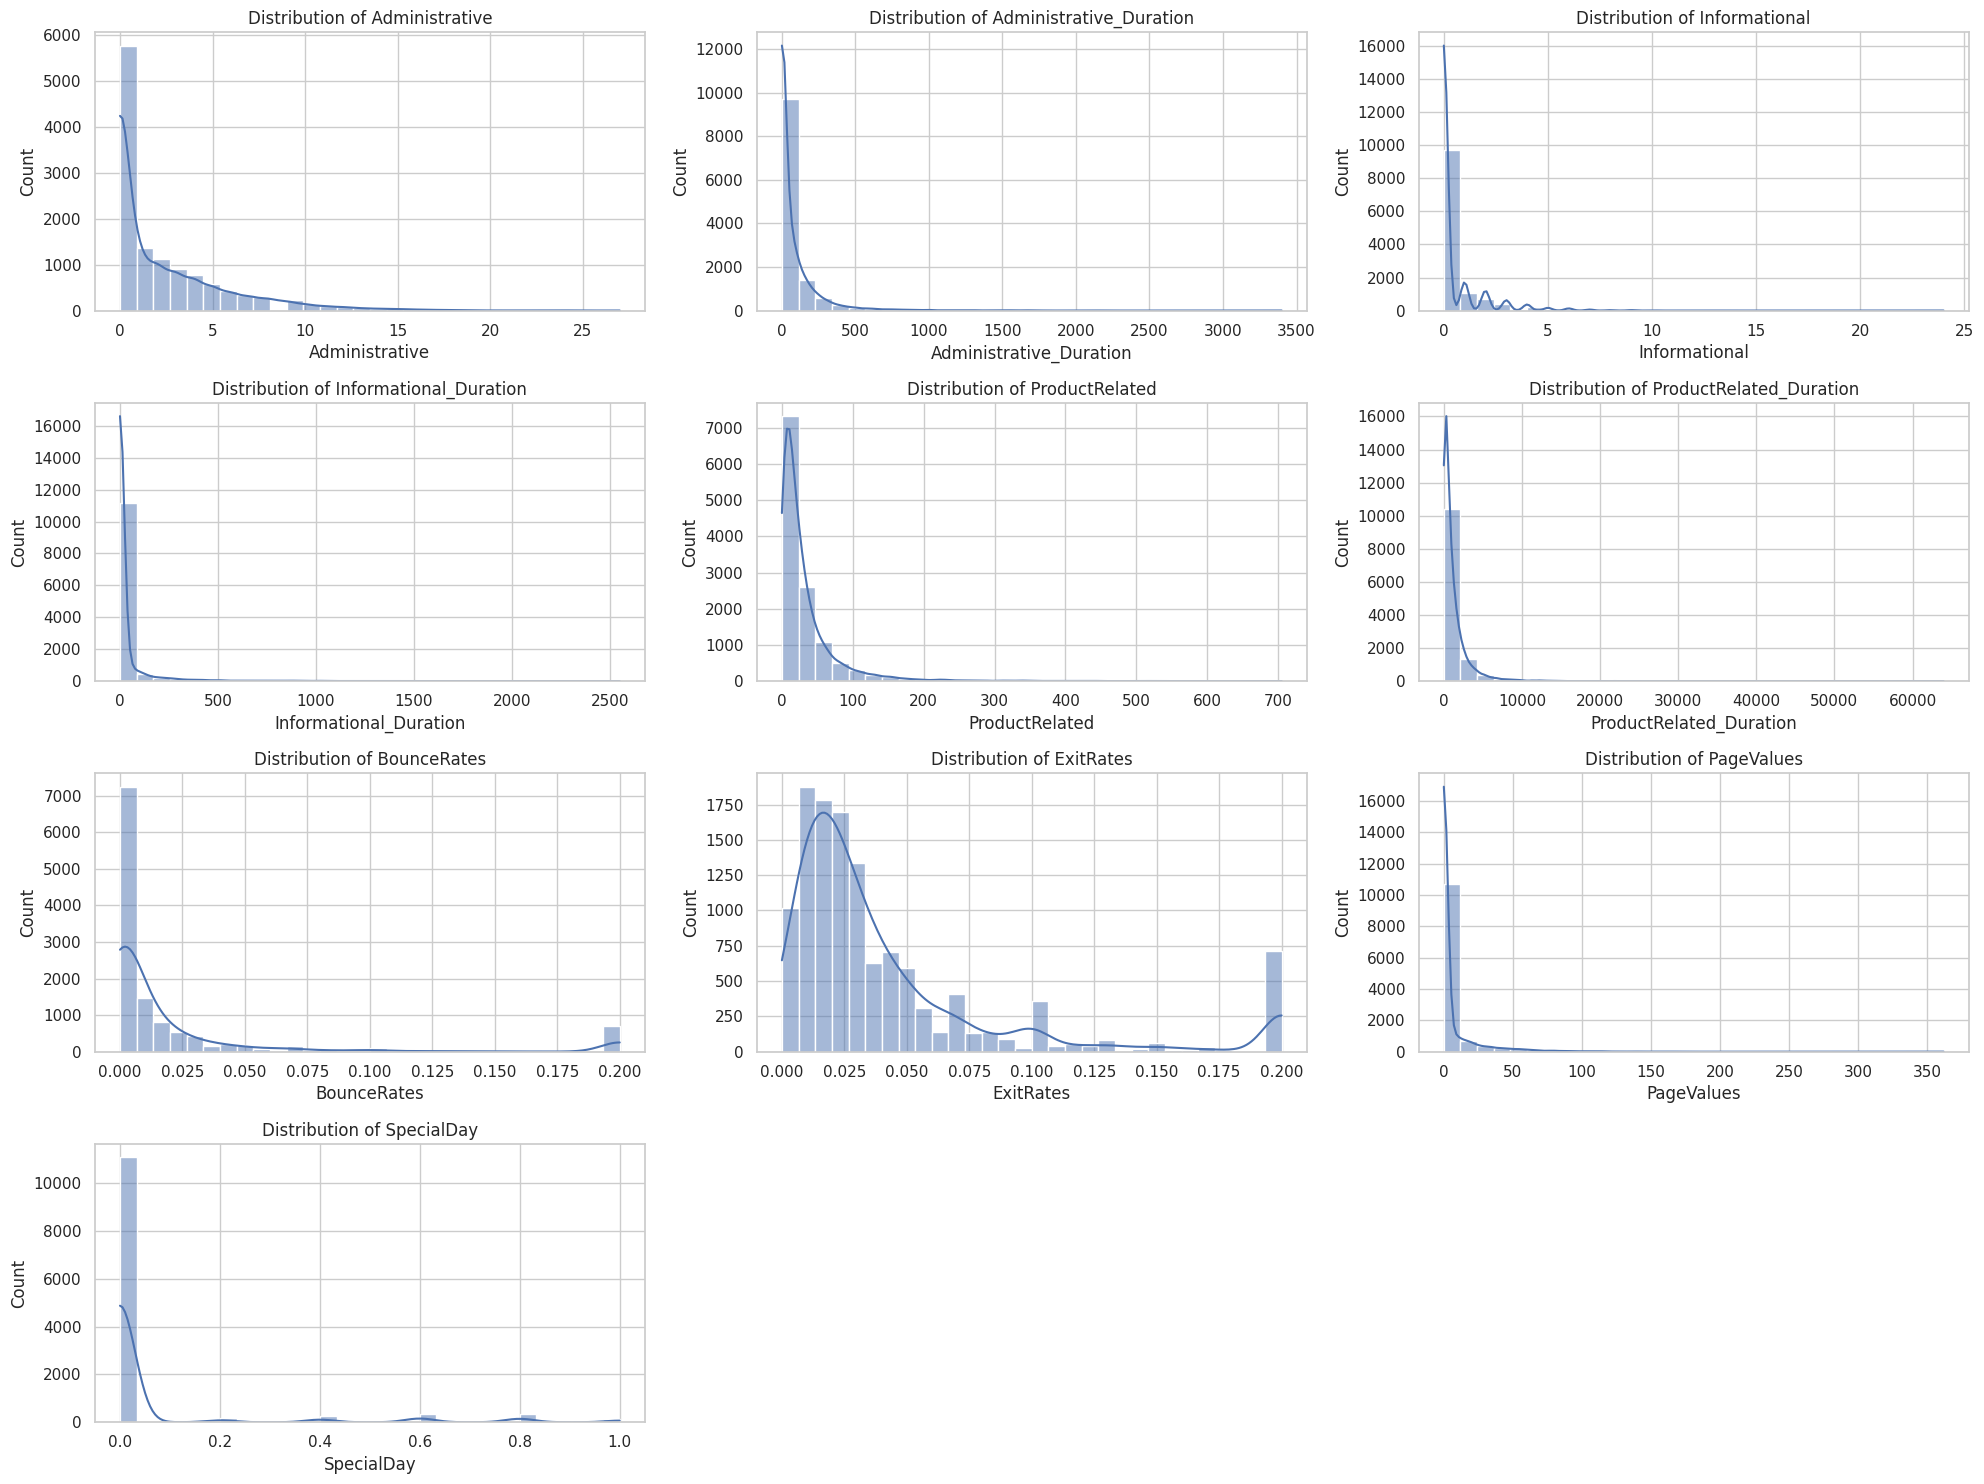

In [ ]:
# Set up the figure size and style
plt.figure(figsize=(20, 15))
sns.set(style="whitegrid")

# Create a distribution plot for each numerical feature
for i, col in enumerate(num_columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    sns.color_palette()
    plt.tight_layout()

plt.show()

######**Explanation**


**1. Administrative and Administrative_Duration:**
*Distribution Chart:* Both features are clustered near zero, indicated that most sessions include minimal or no interactions with administrative pages. Furthermore, as there is variability in 'Administrative', the users may tend to visit many administrative pages for account management when needed only.

*Box Plot:* The majority of data points for both the number of administrative interactions and their durations are near zero, with a siginificant number of outliers. This trend shows while most users engage lightly to account management activities, there are some notable exceptions.

**2. Informational and Informational_Duration:**
*Distribution Chart:*  These 2 features share the same trend as the aforementioned highlighting that informational content is accessed lightly by most users.

*Box Plot:*  Although there are some exceptions where users spend a considerable time on informational sources, most sessions from users do not focus on  informational content.

**3. ProductRelated and ProductRelated_Duration:**

*Distribution Chart:* These features display greater variability compared to the upper pairs indicating the users engage more with product-related pages  compared to administrative and informational.

*Box Plot:* The boxplots show a moderate median level of interaction along with some significant outliers. This reflects although the users spend a reasonable and consistent amount of time on the product-related website,there are sessions with high engagement levels.


**4. BounceRates:**

*Distribution Chart:* Most bounce rates are low which suggests users often engage with more than just the landing page.

*Box Plot:* The plot also support the point above although there were some outliers showing high bounce rates, possibly from pages that fail to attract/retain visitors.


**5. ExitRates:**

*Distribution Chart and Box Plot:* Although the distribution is skewed-right and concentrates around 0.01 to 0.05 which means low exit rates are more common, there is high variability in the user session termininations.


**6. PageValues:**

*Distribution Chart and Box Plot:* Given that the distribution is extremely skwewed towards zero with few outliers,most pages visited during sessions have low economic value and do not contribute to the revenue.

**7.SpecialDay:**

*Distribution Chart and Box Plot:* As the majority of values are 0, indicating that most of the observations are non-speicial days.







#####**Categorical Features**

The dataset comprises Categorical Features including:

1. Month
2. OperatingSystems
3. Browser
4. Region
5. TrafficType
6. Weekend
7. Revenue

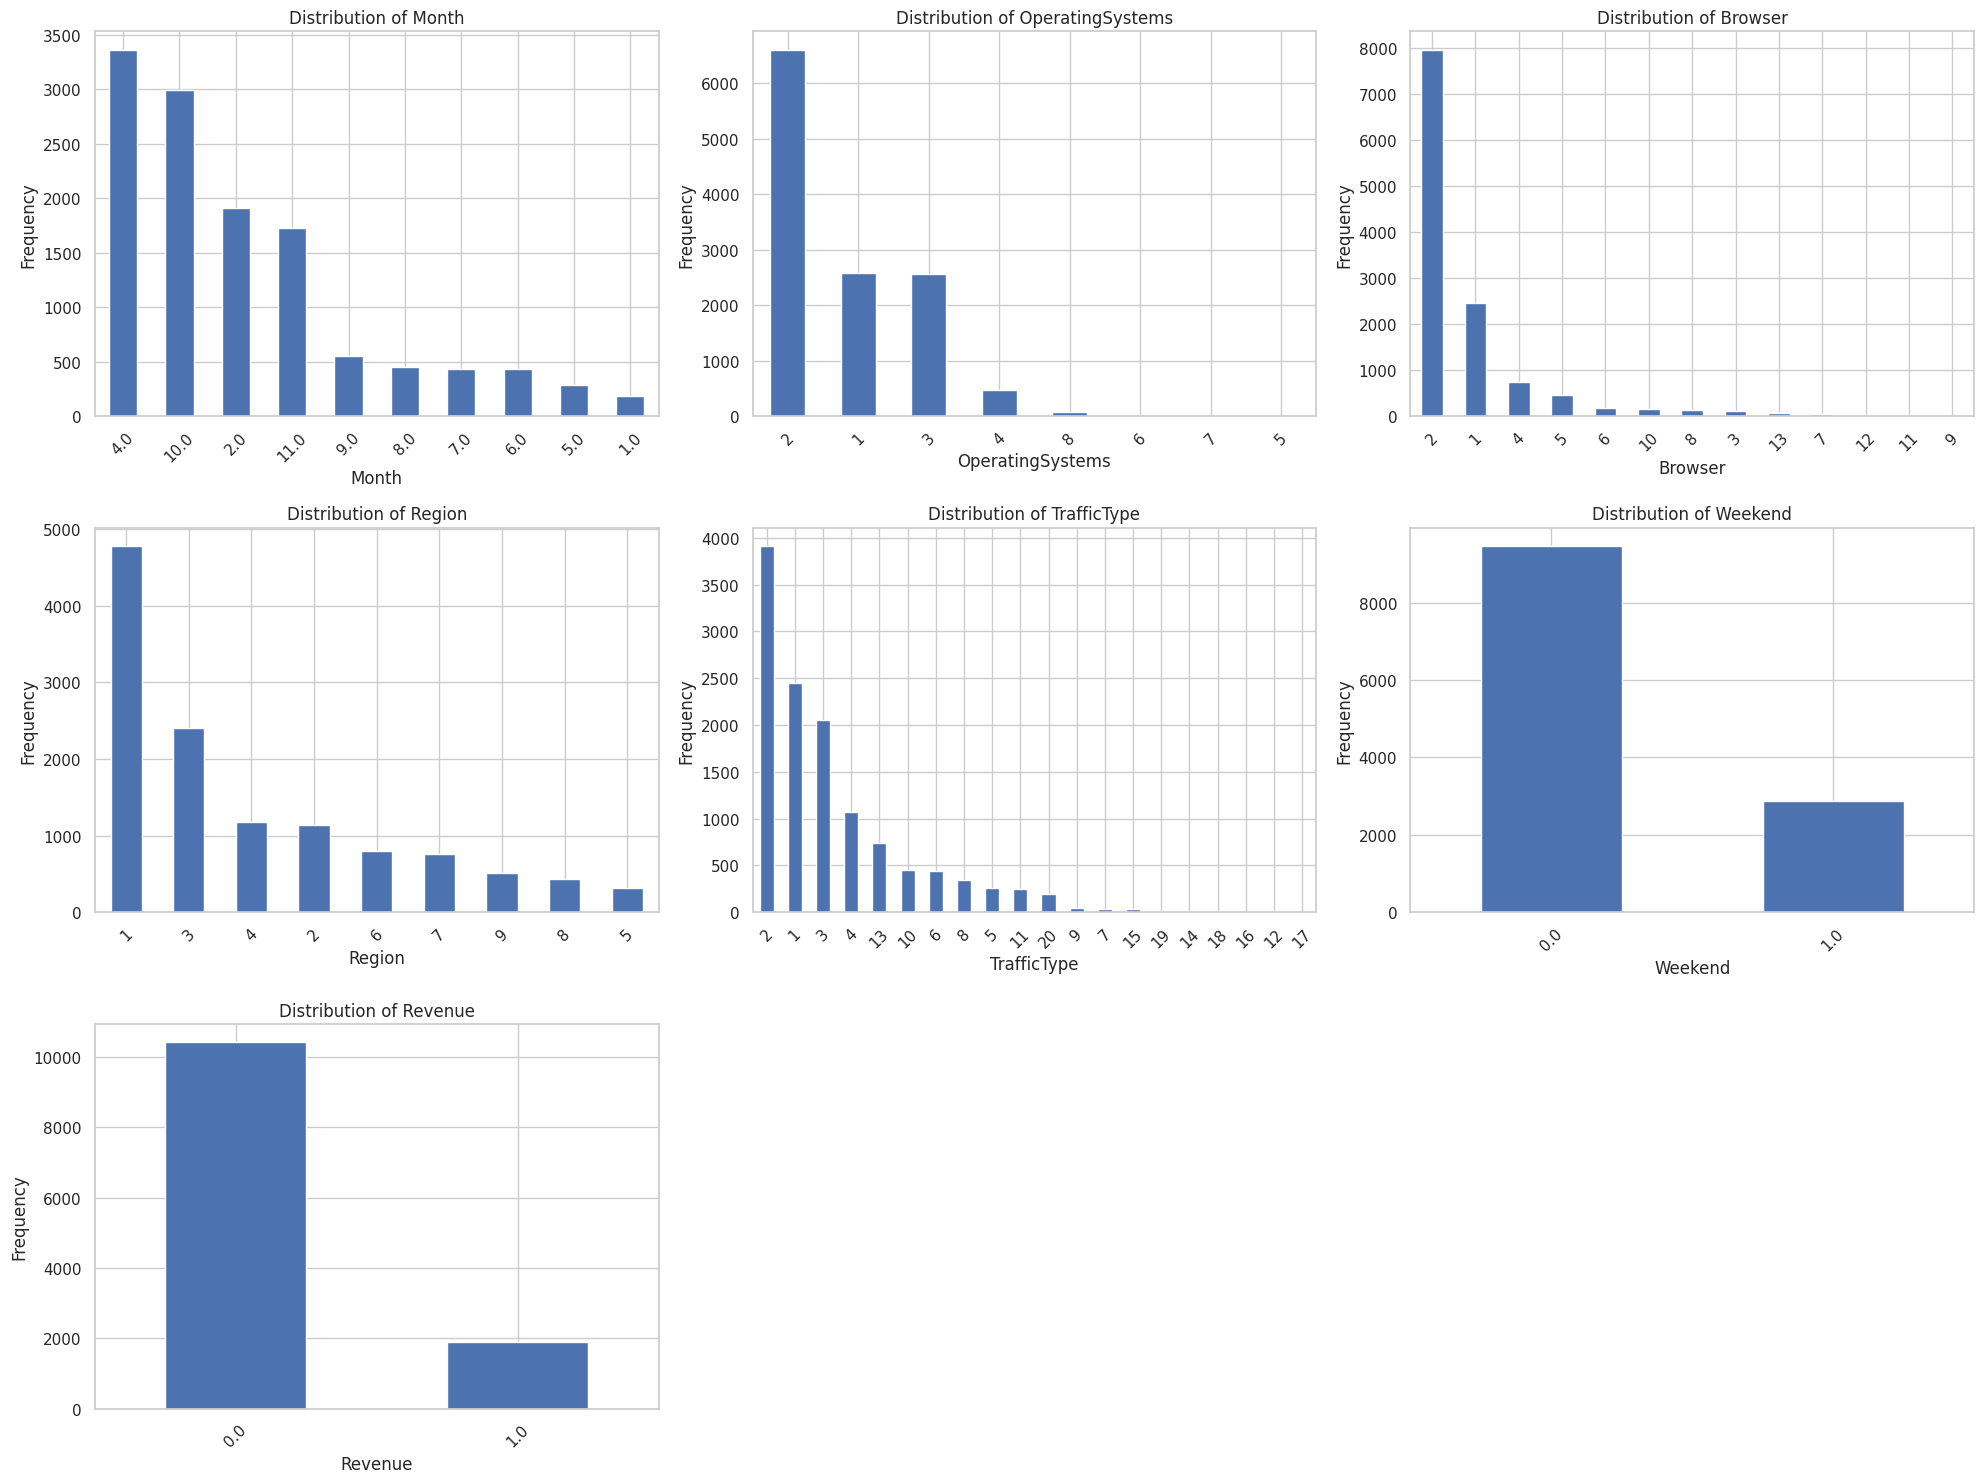

In [ ]:
# List of categorical columns to plot
cat_columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Revenue']

# Set up the figure size and style
plt.figure(figsize=(20, 15))
sns.set(style="whitegrid")

# Create a bar chart for each column
for i, column in enumerate(cat_columns, 1):
    plt.subplot(3, 3, i)
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    sns.color_palette()
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

######**Explanation**

**1. Month:**

The observations concentrated around May, Nov, Mar, Dec compared to the other months.

**2. Operating Systems:**

The dominance of '1'or '2' operating systems suggests that the majority of the site’s user base prefers these systems.

**3. Browser:**
Similar to operating systems, there is a concentration in the use of certain browsers including '2' or '1'.

**4. Region:**
The distribution across different regions, indicating the majority of visitors come from region '1' or '3'.

**5. Traffic Type:**
Various types of traffic sources are depicted, type '2' and '1' are the most effective in attracting visitors.

**6. Weekend:**
There are more visits on weekdays compared to weekends at abvout 3-4 times.

**7. Revenue:**
Based on the chart, the proportion of revenue-generating sessions is lower to the proportion of visitors who do not make buying decisions.

####**2.2.2 Bivariate Analysis**

In [ ]:
#Calculate the correlations
corr = encoded_df.corr()
revenue_correlations = corr['Revenue'].sort_values(ascending = False)
print(revenue_correlations)

Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Month                      0.127372
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
VisitorType               -0.098706
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64


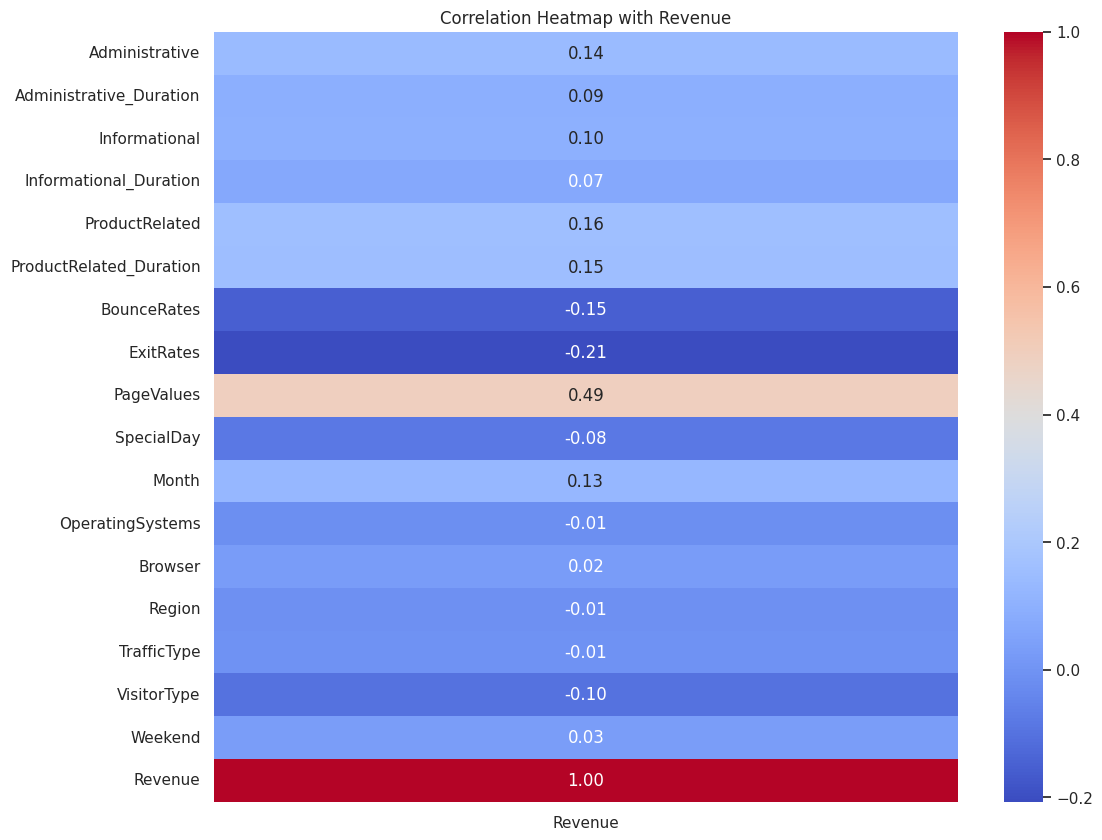

In [ ]:
# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr[['Revenue']], annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap with Revenue')
plt.show()


##### **Key Observations**
1. PageValues (0.49) - Higher PageValues means there is more engagement or value derived from certain pages, which eventually leads to higher revenue.

2. ProductRelated and ProductRelated_Duration (0.16 and 0.15) - This indicates that the sessions with more product_related pages and longer time have a tendency of making buying decisions. This can be explained as the visitors are interested in the produts and want to know more about it.

3. ExitRates and BounceRates (-0.21 and -0.15): These metrics still negatively correlate with revenue, emphasizing the importance of engaging content and user-friendly site navigation that attract and retain visitors on pages.

4. Administrative and Administrative_Duration (0.14 and 0.09): These measurement indicates that the sessions involving administrative actives may result in buying decisions.

5. Informational and Informational_Duration (0.10 and 0.07):
In comparison to the product_related ones, visitors who spend time on these informational have a possibility to make a purchase. The lower can be attributed to the fact that visitors on product_related pages do not have to choose as many as when they visit informational_pages.

6. Month and Weekends (0.13 and 0.03):
Some seasonal effects/free time may influence the purchasing habits.

## **3. Analysis and Prediction Techniques**

In [ ]:
#Split the dataset, with a ratio of training/testing at 8:2
train, test = train_test_split(encoded_df, test_size=0.2, random_state=42)
print('The shape of training set:', train.shape)
print('The shape of testing set:', test.shape)

The shape of training set: (9864, 18)
The shape of testing set: (2466, 18)


### **3.1 Classification Models - Logistic Regression**

Align with Objective 2 "Identifying which features influence the purchasing intention of online shoppers and Predicting whether a shopper will generate revenue."

####**RFE - Logistic Regression**

In [ ]:
#Indicate x_train, y_train, x_test, y_test
x_train = train.drop(['Revenue'], axis=1) #10 features are trained and tested against predictor "rating"
y_train = train['Revenue']
x_test = test.drop(['Revenue'], axis=1)
y_test = test['Revenue']

#Print out the shape of training set and testing set
print('X_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (9864, 17)
y_train shape: (9864,)
X_test shape: (2466, 17)
y_test shape: (2466,)


In [ ]:
#Apply Scaling to the Data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Training Logistic Regression model
logreg = LogisticRegression(max_iter = 1000)

#Apply RFE directly to the scaled data
rfe = RFE(estimator=logreg, n_features_to_select=5, step=1) #use top 5 features.
rfe.fit(x_train_scaled, y_train)

#Calculate the predicted value
logr_y_train_predicted = rfe.predict(x_train_scaled)
logr_y_test_predicted = rfe.predict(x_test_scaled)


In [ ]:
#Display the all of the score and selected features
selected_features= x_train.columns[rfe.support_]
print('Selected features:',selected_features)

Selected features: Index(['ProductRelated', 'ExitRates', 'PageValues', 'SpecialDay', 'Month'], dtype='object')


#### **Performance Evaluation**

In [ ]:
# Confusion matrix for training set
cm_train = confusion_matrix(y_train, logr_y_train_predicted)
cm_train

array([[8195,  172],
       [ 937,  560]])

In [ ]:
# Confusion matrix for testing set
cm_test = confusion_matrix(y_test, logr_y_test_predicted)
cm_test

array([[2005,   50],
       [ 275,  136]])

In [ ]:
#Calculate the accuracy of the model on training and testing set
accuracy_train = accuracy_score(y_train, logr_y_train_predicted)
accuracy_test = accuracy_score(y_test, logr_y_test_predicted)

#Calculate the precision of the model on training and testing set
precision_train = precision_score(y_train, logr_y_train_predicted)
precision_test = precision_score(y_test, logr_y_test_predicted)

#Calculate the recall of the model on training and testing set
recall_train = recall_score(y_train, logr_y_train_predicted)
recall_test = recall_score(y_test, logr_y_test_predicted)

#Calculate the f1 score of the model on training and testing set
f1_train = f1_score(y_train, logr_y_train_predicted)
f1_test = f1_score(y_test, logr_y_test_predicted)

#Display the all of the score
print('Training Set')
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print('\n')
print('Testing Set')
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Training Set
Accuracy: 0.8875709651257097
Precision: 0.7650273224043715
Recall: 0.3740814963259853
F1 Score: 0.5024674742036788


Testing Set
Accuracy: 0.8682076236820763
Precision: 0.7311827956989247
Recall: 0.3309002433090024
F1 Score: 0.4556113902847571


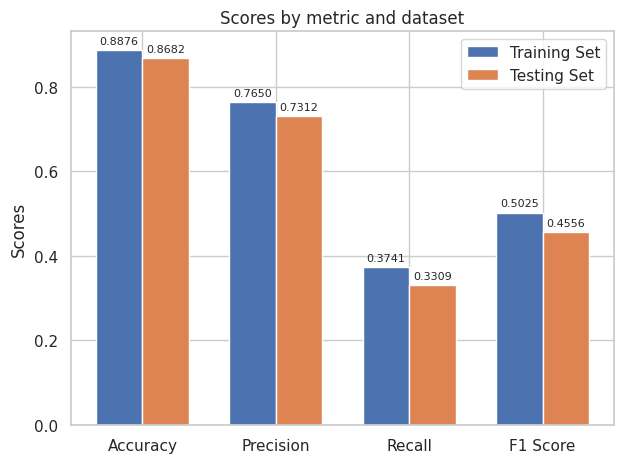

In [ ]:
# Labels and values
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
training_set = [accuracy_train, precision_train, recall_train, f1_train]
testing_set = [accuracy_test, precision_test, recall_test, f1_test]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_set, width, label='Training Set')
rects2 = ax.bar(x + width/2, testing_set, width, label='Testing Set')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by metric and dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                   ha='center', va='bottom', fontsize = 8)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In terms of the Accuracy, the model has slightly higher score on the training set compared to the testing set but still suggest good generalisation as the difference is small.

With regards to the Precision, the score on testing set is slightly lower than on training set indicating a decrease in model's ability to correctly predicts the purchasing decision.

In additions, the lower in recall means the models missess a significance number of actual revenue-generated decisions, which also reflect on f1 score.

### **3.2 Classification Models - K-Nearest Neighbors Classifier**
Align with Objective 2 "Identifying which features influence the purchasing intention of online shoppers and Predicting whether a shopper will generate revenue."

In order to maintain the consistency throughout the portfolio, I will choose the same features from the RFE_Logistic Regression for K-Means Clusutering Model

In [ ]:
input_var = ['ProductRelated', 'ExitRates', 'PageValues', 'SpecialDay', 'Month']
target_var = 'Revenue'

In [ ]:
#Indicate x_train, y_train, x_test, y_test
x_train_knn = train[input_var]
y_train_knn = train[target_var]
x_test_knn = test[input_var]
y_test_knn = test[target_var]

#Print out the shape of training set and testing set
print('Input_train shape:', x_train_knn.shape)
print('Target_train shape:', y_train_knn.shape)
print('Input_test shape:', x_test_knn.shape)
print('Target_test shape:', y_test_knn.shape)

Input_train shape: (9864, 5)
Target_train shape: (9864,)
Input_test shape: (2466, 5)
Target_test shape: (2466,)


In [ ]:
#Apply Scaling to the Data
scaler = StandardScaler()
x_train_knn_scaled = scaler.fit_transform(x_train_knn)
x_test_knn_scaled = scaler.transform(x_test_knn)

####**Basic Model**

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors = 2)
knn_clf.fit(x_train_knn_scaled, y_train_knn)

#Calculate the predicted value
knn_y_train_predicted = knn_clf.predict(x_train_knn_scaled)
knn_y_test_predicted = knn_clf.predict(x_test_knn_scaled)

In [ ]:
#Evaluation
accuracy_train_knn = accuracy_score(y_train_knn, knn_y_train_predicted)
accuracy_test_knn = accuracy_score(y_test_knn, knn_y_test_predicted)
print('Accuracy score on training set:',accuracy_train_knn)
print('Accuracy score on testing set:',accuracy_test_knn)

Accuracy score on training set: 0.9314679643146796
Accuracy score on testing set: 0.8686131386861314


####**Parameter Tuning with Cross Validation**

In [ ]:
#Define search space for parameters
parameter_grid = {'n_neighbors': range(1,200,10)}

#Create the machine learning model with training set
knn_clf = KNeighborsClassifier()
tuning_knn = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=5)
tuning_knn.fit(x_train_knn_scaled, y_train_knn)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 200, 10)}, scoring='accuracy')

In [ ]:
results = tuning_knn.cv_results_
mean_accuracy = results['mean_test_score']
knn_parameters = results['params']

k_value_list = []
for paramiter_dict in knn_parameters:
  k_value = paramiter_dict['n_neighbors']
  k_value_list.append(k_value)

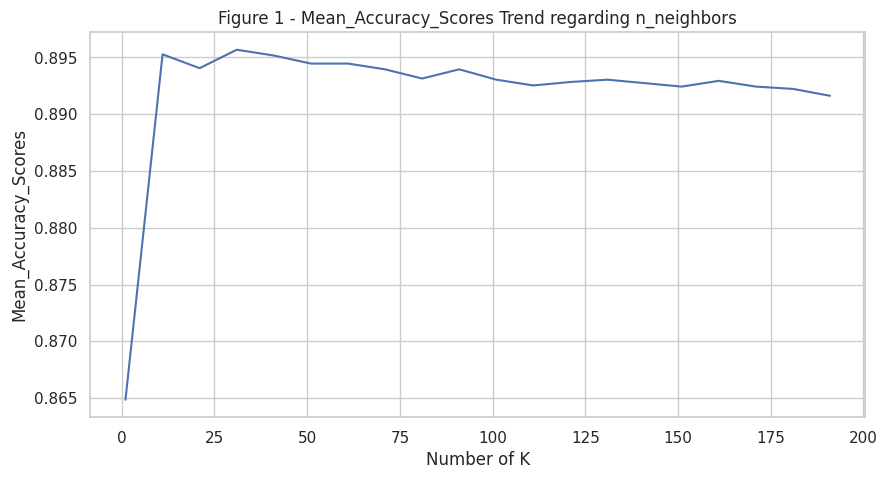

In [ ]:
# accuracy chart for different K values
plt.figure(figsize=(10,5))
plt.plot(k_value_list, mean_accuracy)
plt.xlabel('Number of K')
plt.ylabel('Mean_Accuracy_Scores')
plt.title('Figure 1 - Mean_Accuracy_Scores Trend regarding n_neighbors')
plt.grid(True)
plt.show()

To begin with, the accuracy increases rapidly as the k rises to around 35 which means the model benefits from more neighbors to reduce the overfitting. However, as the k increases further, the model's accuracy stabilizes and experiences downward trend as it suffers from the underfitting issue.

In [ ]:
#Identift the best parameters
best_k = tuning_knn.best_params_['n_neighbors']
best_accuracy = tuning_knn.best_score_
print('Best K value:',best_k)

Best K value: 31


In [ ]:
best_knn_clf = KNeighborsClassifier(n_neighbors=best_k)
best_knn_clf.fit(x_train_knn, y_train_knn)

best_knn_y_train_predicted = best_knn_clf.predict(x_train_knn)
best_knn_y_test_predicted = best_knn_clf.predict(x_test_knn)

#Evaluation
accuracy_train_knn_t = accuracy_score(y_train_knn, best_knn_y_train_predicted)
accuracy_test_knn_t = accuracy_score(y_test_knn, best_knn_y_test_predicted)
print('Accuracy score on training set:',accuracy_train_knn_t)
print('Accuracy score on testing set:',accuracy_test_knn_t)

Accuracy score on training set: 0.8976074614760746
Accuracy score on testing set: 0.8860502838605029


####**Performance Evaluation**

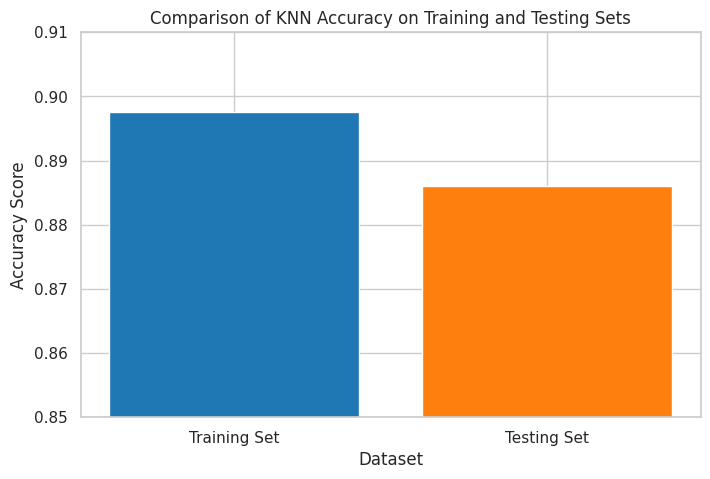

In [ ]:
# Labels for the bars
labels = ['Training Set', 'Testing Set']

# Values for the bars
values = [accuracy_train_knn_t, accuracy_test_knn_t]

# Creating the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy Score')
plt.title('Comparison of KNN Accuracy on Training and Testing Sets')
plt.ylim([0.85, 0.91])  # Set the limit for y-axis to make differences more visible
plt.show()

In comparison with the previous "n_neighbors = 2", at the "n_neighbors = 31", although the accuracy on training set has been decreased, the model seems to be generalized for unseen data as reflected by an increase in accuracy on testing set. Moreover, the difference between the accuracy scores from 2 sets is narrowed down to around 1%.

###**3.3 Comparison between Logistic Regression and KNN Classifier**
Align with objective 3 "Compare which models is more efficient compared to the other (Logistic Regression/KNN Classifier)"

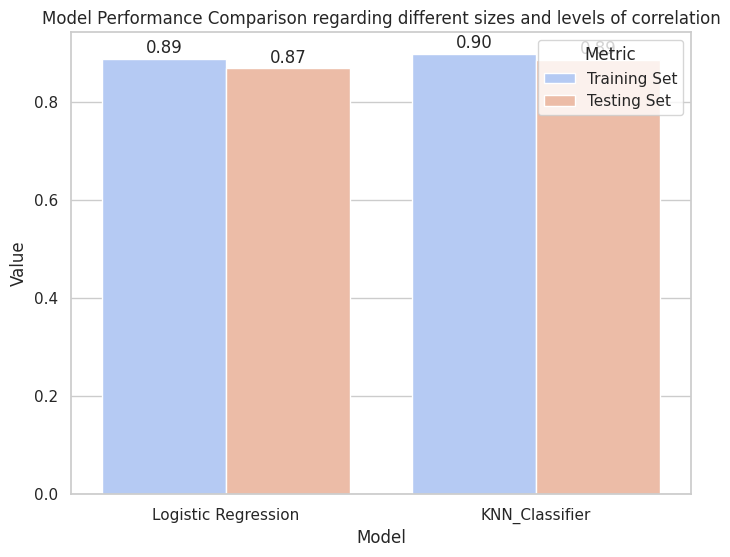

In [ ]:
#Create a dataframe consists of required value
data = {
    'Model': ['Logistic Regression', 'Logistic Regression', 'KNN_Classifier', 'KNN_Classifier'],
    'Metric': ['Training Set', 'Testing Set', 'Training Set', 'Testing Set'],
    'Value': [accuracy_train, accuracy_test, accuracy_train_knn_t, accuracy_test_knn_t]
}
df = pd.DataFrame(data)

#Create the bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))  # Set the figure size
bar_plot = sns.barplot(x='Model', y='Value', hue='Metric', data=df, ci=None, palette = 'coolwarm')

#Add the annotate on each bar
for p in bar_plot.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than 0
        bar_plot.annotate(format(height, '.2f'),
                          (p.get_x() + p.get_width() / 2., height),
                          ha='center', va='center',
                          xytext=(0, 8),
                          textcoords='offset points')

#Add title and legend for the metric
bar_plot.set_title('Model Performance Comparison regarding different sizes and levels of correlation')
bar_plot.set_xlabel('Model')

plt.show()


This chart have shown the robustness of the KNN Classifier in this scenario compared to the Logistic Regression model. However, as the difference between these 2 models regarding the accuracy score is not significant, we can say that these 2 models are capable of capturing the underlying patterns in the buying decisions of the page visitors using the categorical and numberical features without much overfitting.

##**4. Conclusion**


This portfolio provides insights into the behaviors of online shoppers and how these behaviors influence purchasing decisions. By understanding the relationships between various features, businesses can better target their campaigns and development efforts. This focused approach helps in capturing and retaining page visitors, ultimately enhancing the likelihood of revenue generation.